In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Train Data

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/codSoft/genre classification/train_data.txt', sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [ ]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# Explore Data

In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.shape

(54214, 3)

In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

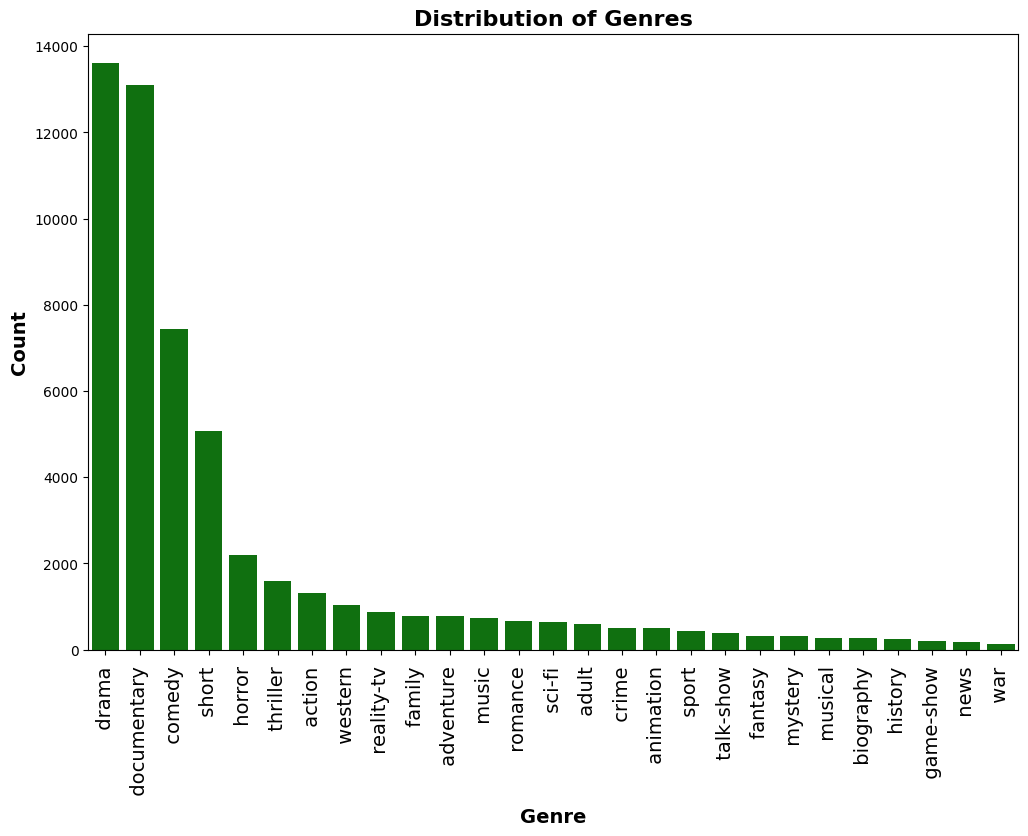

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

genre_counts = train_data.Genre.value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts, color='green')

plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14);

# Read Test Data

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/codSoft/genre classification/test_data_solution.txt', sep=":::", names=["Title","Genre" ,"Description"], engine="python")

# Explore data

In [ ]:
test_data.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
test_data.describe()

,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [ ]:
test_data.shape

(54200, 3)

In [ ]:
test_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

# Data preprocessing

### Cleaning description text  : remove numbers, punctuations, stop words.....

In [ ]:
#length of description in  20 fisrt rows before cleaning
train_data['Description'].apply(len).head(20)

1      546
2      184
3      650
4     1082
5      625
6     1609
7      345
8      332
9      456
10     426
11     358
12     168
13     815
14     320
15     521
16     258
17     327
18     534
19    2002
20     299
Name: Description, dtype: int64

In [ ]:
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words


# cleaning function
def clean_text(text):
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Removing stop words
    text = ' '.join([word for word in text.split() if word not in sklearn_stop_words])

    return text


train_data['cleaned_description'] = train_data['Description'].apply(clean_text)
train_data.head()
test_data['cleaned_description'] = test_data['Description'].apply(clean_text)
test_data.head()

,Title,Genre,Description,cleaned_description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job especial...
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging weal...
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,year life albin family shepherds north transyl...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died spoken brother years cancer diego ...
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [ ]:
# lemmatize text : for example words like runs, running, ran will be reduced to run
# this step takes a lot to be executed !
"""
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize text
def lemmatize_text(text):
    global i

    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

train_data['cleaned_description'] = train_data['cleaned_description'].apply(lemmatize_text)
train_data.head()
"""

'\nimport spacy\n\n# Load spaCy\'s English language model\nnlp = spacy.load("en_core_web_sm")\n\n# Function to lemmatize text\ndef lemmatize_text(text):\n    global i\n    \n    doc = nlp(text)\n    lemmatized_text = \' \'.join([token.lemma_ for token in doc])\n    return lemmatized_text\n\ntrain_data[\'cleaned_description\'] = train_data[\'cleaned_description\'].apply(lemmatize_text)\ntrain_data.head()\n'

# Feature Extraction with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()

X_train = vector.fit_transform(train_data["cleaned_description"])
X_test = vector.transform(test_data["cleaned_description"])

y_train = train_data["Genre"]
y_test = test_data["Genre"]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54214, 146882)
(54214,)
(54200, 146882)
(54200,)


# Training the model with different classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    # Train
    model = classifier.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # report
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report


In [ ]:
# Train and evaluate each classifier
results = {}

In [ ]:
name = 'Logistic Regression'
clf =  classifiers[name]
accuracy, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test )
results[name] = {
    'accuracy': accuracy,
    'report': report
}
print(f"Results for {name}:")
print(f"Accuracy: {results[name]['accuracy']}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Results for Logistic Regression:
Accuracy: 0.5852583025830258
Classification Report:
{' action ': {'precision': 0.5217391304347826, 'recall': 0.2648401826484018, 'f1-score': 0.35133770822816757, 'support': 1314}, ' adult ': {'precision': 0.5846153846153846, 'recall': 0.19322033898305085, 'f1-score': 0.2904458598726115, 'support': 590}, ' adventure ': {'precision': 0.6964285714285714, 'recall': 0.15096774193548387, 'f1-score': 0.2481442205726405, 'support': 775}, ' animation ': {'precision': 0.5714285714285714, 'recall': 0.024096385542168676, 'f1-score': 0.04624277456647399, 'support': 498}, ' biography ': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 264}, ' comedy ': {'precision': 0.5370902129696099, 'recall': 0.6028740263228579, 'f1-score': 0.5680840293596557, 'support': 7446}, ' crime ': {'precision': 0.3225806451612903, 'recall': 0.019801980198019802, 'f1-score': 0.0373134328358209, 'support': 505}, ' documentary ': {'precision': 0.6517943743937924, 'recall': 0.8723

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


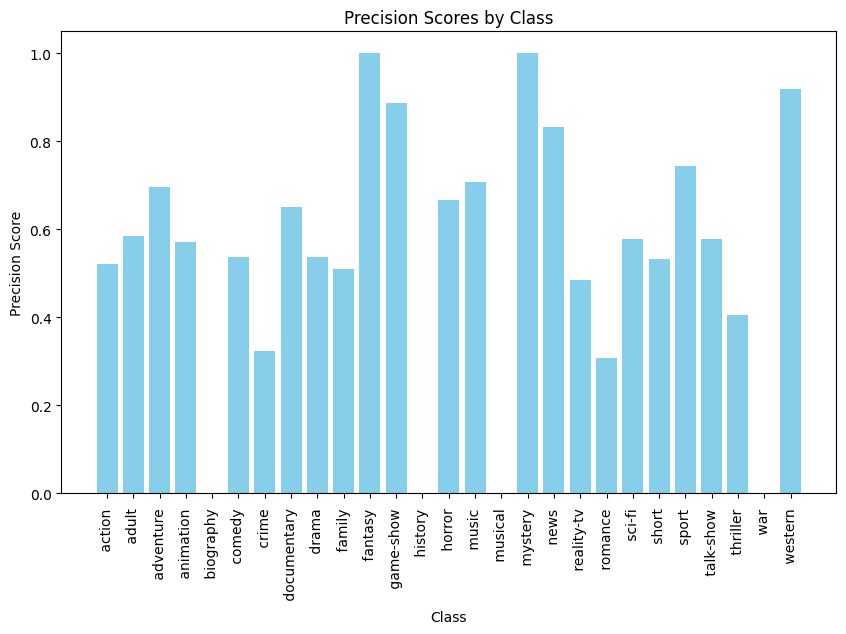

In [ ]:
report = results['Logistic Regression']['report']
precision_scores = {class_name: metrics['precision'] for class_name, metrics in report.items() if class_name not in ['accuracy', 'macro avg', 'weighted avg']}

precision_df = pd.DataFrame(list(precision_scores.items()), columns=['Class', 'Precision'])

plt.figure(figsize=(10, 6))
plt.bar(precision_df['Class'], precision_df['Precision'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Precision Scores by Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')

plt.show()

In [ ]:
name = 'Naive Bayes'
clf =  classifiers[name]
accuracy, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test )
results[name] = {
    'accuracy': accuracy,
    'report': report
}
print(f"Results for {name}:")
print(f"Accuracy: {results[name]['accuracy']}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Naive Bayes:
Accuracy: 0.44317343173431734


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


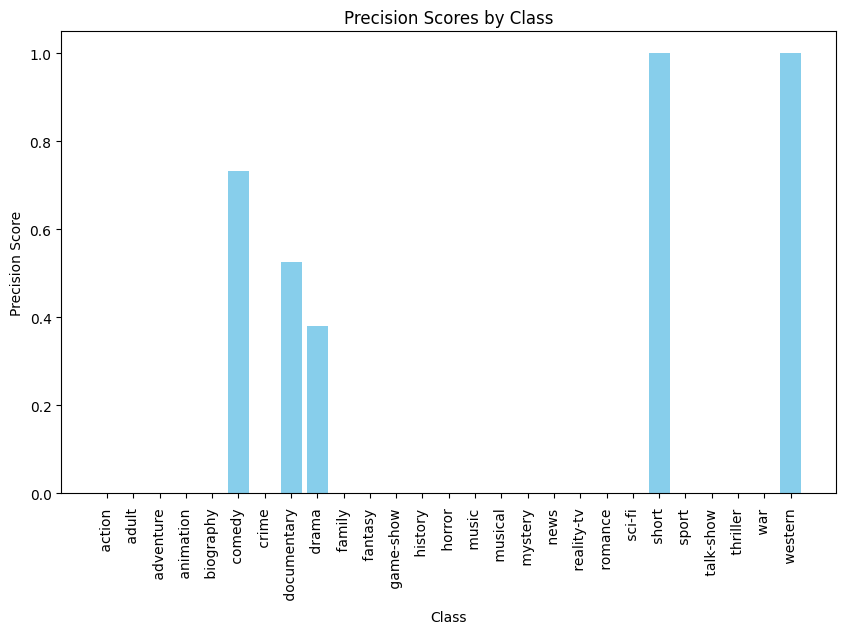

In [ ]:
report = results['Naive Bayes']['report']
precision_scores = {class_name: metrics['precision'] for class_name, metrics in report.items() if class_name not in ['accuracy', 'macro avg', 'weighted avg']}

precision_df = pd.DataFrame(list(precision_scores.items()), columns=['Class', 'Precision'])

plt.figure(figsize=(10, 6))
plt.bar(precision_df['Class'], precision_df['Precision'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Precision Scores by Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')

plt.show()

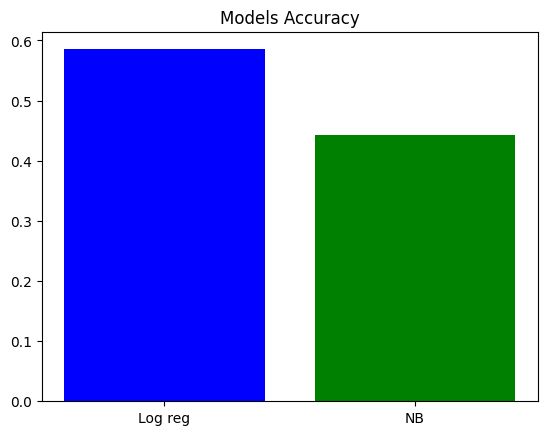

In [ ]:
labels = ['Log reg', 'NB']
values = [results['Logistic Regression']['accuracy'], results['Naive Bayes']['accuracy']]

plt.bar(labels, values, color=['blue', 'green'])

plt.title('Models Accuracy')

plt.show()

## Based on the evaluation metrics , Logistic Regression appears to perform better than Naive Bayes for this particular dataset